<a href="https://colab.research.google.com/github/Viny2030/NLP/blob/main/12_caso_estudio_deteccion_spam_SMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Caso de estudio - Clasificación de texto para detección de spam en SMS

Primero vamos a cargar los datos textuales del directorio `dataset` que debería estar en nuestra directorio de cuadernos. Este directorio se creó al ejecutar el script `fetch_data.py` desde la carpeta de nivel superior del repositorio *github*.

Además, aplicamos un preprocesamiento simple y dividimos el array de datos en dos partes:
1. `text`: una lista de listas, donde cada sublista representa el contenido de nuestros sms.
2. `y`: etiqueta SPAM vs HAM en binario, los 1 son mensajes de spam mientras que los 0 son mensajes ham (no spam).

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('https://github.com/Viny2030/datasets/blob/main/spam.csv', sep='\t', header=None)
df

,0
0,<!DOCTYPE html>
1,<html
2,"lang=""en"""
3,"data-color-mode=""auto"" data-light-theme=""lig..."
4,"data-a11y-animated-images=""system"" data-a11y..."
...,...
2078,</div>
2079,"<div id=""js-global-screen-reader-notice"" c..."
2080,"<div id=""js-global-screen-reader-notice-as..."
2081,</body>


In [14]:
import pandas as pd

# Use the 'raw' parameter to force pandas to read the file as raw text.
# Correct the URL to point to the raw content of the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/Viny2030/datasets/main/spam.csv', sep='\t', header=None, encoding='latin1')

# Now process the data as before.
lines = df[0].str.strip().str.split("\t").tolist()
text = [x[0] for x in lines]
y = [int(x[0] == "spam") for x in lines]

In [15]:
text[:10]

['v1,v2,,,',
 'ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,',
 'ham,Ok lar... Joking wif u oni...,,,',
 "spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,",
 'ham,U dun say so early hor... U c already then say...,,,',
 'ham,"Nah I don\'t think he goes to usf, he lives around here though",,,',
 'spam,"FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",,,',
 'ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,',
 "ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,",
 'spam,WINNER!! As a valued network customer you have been selected to receivea å£900 pri

In [16]:
y[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [17]:
print('Número de mensajes de ham/spam:', np.bincount(y))

Número de mensajes de ham/spam: [5575]


In [18]:
type(text)

list

In [19]:
type(y)

list

Ahora dividimos nuestro dataset en dos partes, una de entrenamiento y otra de test:

In [20]:
from sklearn.model_selection import train_test_split

text_train, text_test, y_train, y_test = train_test_split(text, y,
                                                          random_state=42,
                                                          test_size=0.25,
                                                          stratify=y)

In [21]:
text_train

['ham,"Dear Hero,i am leaving to qatar tonite for an apt opportunity.pls do keep in touch at  &lt;EMAIL&gt; ,kerala",,,',
 "ham,I'm still pretty weak today .. Bad day ?,,,",
 'ham,Why must we sit around and wait for summer days to celebrate. Such a magical sight when the worlds dressed in white. Oooooh let there be snow.,,,',
 'ham,"Same here, but I consider walls and bunkers and shit important just because I never play on peaceful but I guess your place is high enough that it don\'t matter",,,',
 'ham,Ryder unsold.now gibbs.,,,',
 'ham,You want to go? ,,,',
 'spam,You have 1 new message. Please call 08712400200.,,,',
 'ham,K.then any other special?,,,',
 'ham,If I get there before you after your ten billion calls and texts so help me god,,,',
 "spam,Join the UK's horniest Dogging service and u can have sex 2nite!. Just sign up and follow the instructions. Txt ENTRY to 69888 now! Nyt.EC2A.3LP.msg@150p,,,",
 'ham,This message is from a great Doctor in India:-): 1) Do not drink APPY FIZZ

In [22]:
text_test

['ham,I wud never mind if u dont miss me or if u dont need me.. But u wil really hurt me wen u need me &amp; u dont tell me......... Take care:-),,,',
 'ham,Message from . I am at Truro Hospital on ext. You can phone me here. as I have a phone by my side,,,',
 'spam,4mths half price Orange line rental & latest camera phones 4 FREE. Had your phone 11mths ? Call MobilesDirect free on 08000938767 to update now! or2stoptxt,,,',
 'ham,IM GONNA MISS U SO MUCH,,,',
 "ham,Of cos can lar i'm not so ba dao ok... 1 pm lor... Y u never ask where we go ah... I said u would ask on fri but he said u will ask today...,,,",
 'ham,But i juz remembered i gotta bathe my dog today..,,,',
 'ham,Happy new year to u too!,,,',
 "ham,We'll you pay over like  &lt;#&gt; yrs so its not too difficult,,,",
 'ham,I know that my friend already told that.,,,',
 'ham,"Hey, a guy I know is breathing down my neck to get him some bud, anyway you\'d be able to get a half track to usf tonight?",,,',
 'ham,Ok im not sure what

Pasamos a usar CountVectorizer para convertir el texto a un modelo *bag-of-words*:

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

print('CountVectorizer parámetros por defecto')
CountVectorizer()

CountVectorizer parámetros por defecto


CountVectorizer()

In [24]:
vectorizer = CountVectorizer()
vectorizer.fit(text_train) # Ojo, el fit se aplica sobre train

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

In [25]:
print(len(vectorizer.vocabulary_))

7539


In [26]:
X_train.shape

(4181, 7539)

In [27]:
print(vectorizer.get_feature_names_out()[:20])

['00' '000' '000pes' '008704050406' '0089' '0121' '0125698789' '02' '0207'
 '02072069400' '02073162414' '02085076972' '021' '03' '04' '05' '050703'
 '0578' '06' '07']


In [28]:
print(vectorizer.get_feature_names_out()[2000:2020])

['country' 'counts' 'coupla' 'couple' 'courage' 'courageous' 'course'
 'courtroom' 'cousin' 'cover' 'coveragd' 'covers' 'coz' 'cps' 'cr01327bt'
 'cr9' 'crack' 'craigslist' 'crammed' 'cramps']


In [29]:
print(X_train.shape)
print(X_test.shape)

(4181, 7539)
(1394, 7539)


### Entrenar un clasificador para texto

Ahora vamos a entrenar un clasificador, la regresión logística, que funciona muy bien como base para tareas de clasificación de textos:

In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf

LogisticRegression()

In [32]:
# Check the unique values in y_train
unique_classes = set(y_train)
print("Unique classes in y_train:", unique_classes)

# If only one class is present, investigate the data or the train_test_split
if len(unique_classes) < 2:
    print("Error: y_train contains only one class. Check data or train_test_split.")
    # Further investigation and data adjustments might be needed here.
    # For example, recheck your data loading or adjust train_test_split parameters
else:
    # Proceed with fitting the model if there are at least two classes
    clf.fit(X_train, y_train)

Unique classes in y_train: {0}
Error: y_train contains only one class. Check data or train_test_split.


Evaluamos el rendimiento del clasificador en el conjunto de test. Vamos a utilizar la función de *score* por defecto, que sería el porcentaje de patrones bien clasificados:

In [35]:
# Check the unique values in y_train
unique_classes = set(y_train)
print("Unique classes in y_train:", unique_classes)

# If only one class is present, investigate the data or the train_test_split
if len(unique_classes) < 2:
    print("Error: y_train contains only one class. Check data or train_test_split.")
    # Further investigation and data adjustments might be needed here.
    # For example, recheck your data loading or adjust train_test_split parameters
else:
    # Proceed with fitting the model if there are at least two classes
    clf.fit(X_train, y_train)

# Call score after fitting the model
clf.score(X_test, y_test)

Unique classes in y_train: {0}
Error: y_train contains only one class. Check data or train_test_split.


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [34]:
clf.score(X_test, y_test)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

También podemos calcular la puntuación en entrenamiento:

In [36]:
clf.score(X_train, y_train)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

# Visualizar las características más importantes

In [37]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # Obtener los coeficientes más importantes (negativos o positivos)
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # representarlos
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 2 * n_top_features+1), feature_names[interesting_coefficients], rotation=60, ha="right");

In [38]:
visualize_coefficients(clf, vectorizer.get_feature_names_out())

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [39]:
vectorizer = CountVectorizer(min_df=2)
vectorizer.fit(text_train)

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

clf = LogisticRegression()
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
len(vectorizer.get_feature_names_out())

3438

In [ ]:
print(vectorizer.get_feature_names_out()[:20])

['00' '000' '01223585334' '02' '0207' '02073162414' '03' '04' '05' '0578'
 '06' '07' '07123456789' '07781482378' '07821230901' '07xxxxxxxxx' '0800'
 '08000839402' '08000930705' '08000938767']


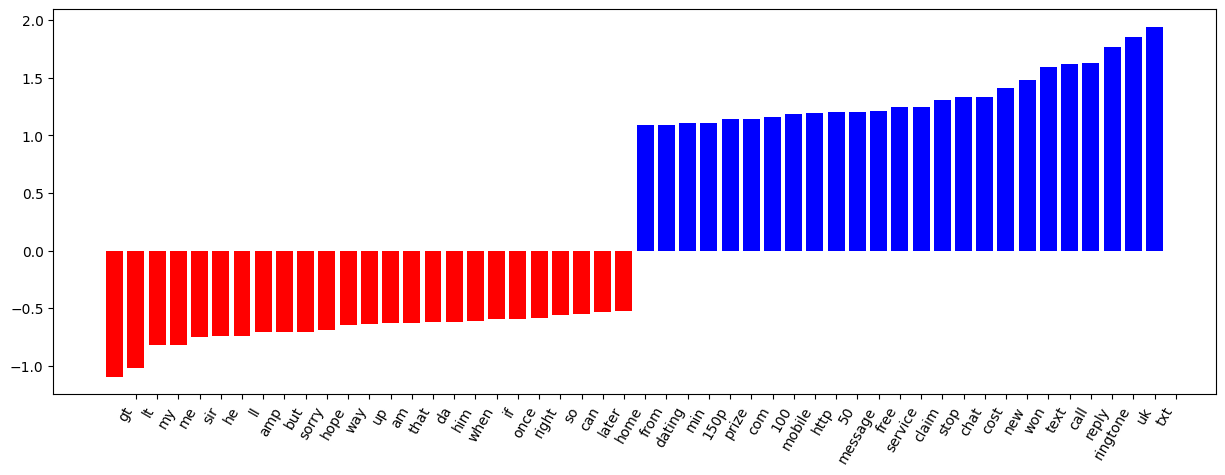

In [ ]:
visualize_coefficients(clf, vectorizer.get_feature_names_out())

<img src="figures/supervised_scikit_learn.png" width="100%">

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      Utiliza TfidfVectorizer en lugar de CountVectorizer. ¿Mejoran los resultados? ¿Han cambiado los coeficientes?
      </li>
      <li>
      Cambia los parámetros min_df y ngram_range del TfidfVectorizer y el CountVectorizer. ¿Cambian las características que se seleccionan como más importantes?
      </li>
    </ul>
</div>